In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Categories=['NORMAL','PNEUMONIA']

In [3]:
flat_data_arr=[]
target_arr=[]

In [4]:
flat_data_arr_test=[]
target_arr_test=[]

In [5]:
datadir = '/kaggle/input/balanced-chest-xray/balanced/train'
datadir2 = '/kaggle/input/balanced-chest-xray/balanced/test'

In [6]:
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(128,128,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [17]:
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir2,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(128,128,3))
        flat_data_arr_test.append(img_resized.flatten())
        target_arr_test.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


flat_data_test=np.array(flat_data_arr_test)
target_test=np.array(target_arr_test)
df=pd.DataFrame(flat_data_test)
df['Target']=target_test
x_test2=df.iloc[:,:-1]
y_test2=df.iloc[:,-1]

In [15]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

df=pd.DataFrame(flat_data)
df['Target']=target

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.shape

(7716, 49152)

In [19]:
def load_image(datadir, Categories):

    flat_data_arr=[]
    target_arr=[]

    for i in Categories:

        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(128,128,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')

    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)

    df=pd.DataFrame(flat_data)
    df['Target']=target

    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    return x, y

In [20]:
x_test, y_test = load_image(datadir2, Categories)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [21]:
import time
def _time(start, end): 
    # if in seconds 
    if (end-start)<60: 
        wall_time = f'{round((end-start),2)}sec'
    # if in minute(s)  
    elif (end-start)>=3600: 
        wall_time = f'{int((end-start)/3600)}h {int(((end-start)%3600)/60)}min {round((end-start)%60,2)}sec'
    # if in houre(s)  
    else: 
        wall_time = f'{int((end-start)/60)}min {round((end-start)%60,2)}sec'
    return wall_time

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [22]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score, roc_curve,
    precision_score,
    recall_score
)

In [23]:
classifer_Gauss = GaussianNB()

model_Gauss = classifer_Gauss.fit(x, y)


In [24]:
from sklearn.metrics import classification_report

The predicted Data is :
[1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 

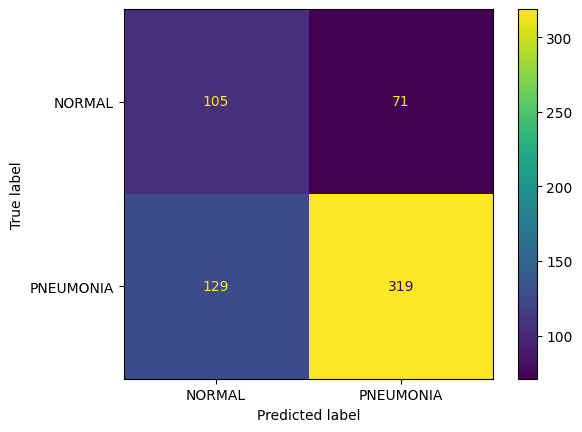

In [27]:
# for Gaussian NB
start = time.time()

y_pred=model_Gauss.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(classification_report(y_test, y_pred, target_names=Categories))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Categories)
disp.plot()
model_Gauss.score(x_test, y_test)
print('Time taken: ', _time(start, time.time()))

Precision: 0.6688
Recall: 0.6795
F1-score: 0.6679


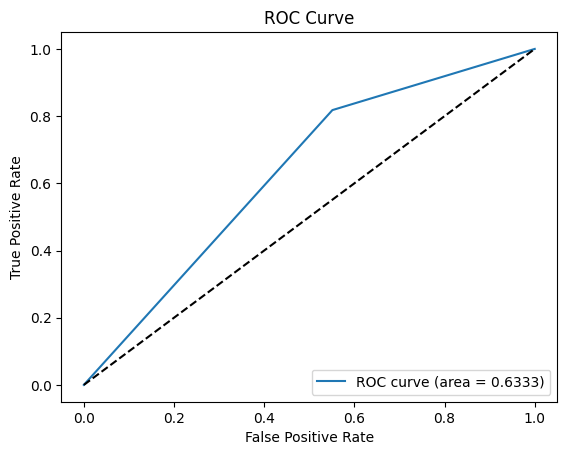

ROC-AUC Score: 0.6333


In [28]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Compute ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

In [ ]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model_Gauss.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model_Gauss.predict(l)[0]])

In [ ]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model_Gauss.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model_Gauss.predict(l)[0]])